In [1]:
PATH_SALE_2023_DIRECTORY: str = r'.\clean_data\sale_2023'
PATH_SALE_2024_DIRECTORY: str = r'.\clean_data\sale_2024'
city = 'Krakow'

map_link = "https://msip.um.krakow.pl/kompozycje/?link=af4002ca8ac4d5c790bcc24b420b7316&config=config_zbiorcza.json"

In [2]:
# Імпорт функцій з файлу analysis_visualization_krakow_2023_2024.py

from analysis_visualization_krakow_2023_2024 import (
    combines_sale_files,
    visualize_avg_price_per_sqm_on_map,
    visualize_price_vs_amenities_correlation,
    visualize_poi_influence_on_price,
    visualize_poi_popularity_by_parameters,
    visualize_price_distribution_boxplot,
    visualize_build_year_and_condition,
    visualize_ownership_and_condition_vs_price,
    visualize_centre_distance_and_build_year_vs_price,
    visualize_build_year_and_floor_distribution

)

In [3]:
df = combines_sale_files(PATH_SALE_2023_DIRECTORY,PATH_SALE_2024_DIRECTORY,city_name=city)

In [4]:
visualize_avg_price_per_sqm_on_map(df)

### Аналітичний висновок 

Ця візуалізація є тепловою картою, що показує розподіл середніх цін за квадратний метр квартир у Кракові на мапі міста. Вона відображає, де саме у місті ціни на квартири є найвищими та найнижчими.

#### Основні спостереження:
1. **Центральна частина міста**: У центрі Кракова спостерігається висока концентрація червоного кольору, що вказує на значно вищі ціни за квадратний метр. Це очікувано, оскільки центральні райони зазвичай мають кращу інфраструктуру, більше зручностей, а також більш розвинену мережу транспортних вузлів.
  
2. **Периферія**: У районах, розташованих далі від центру, теплова карта має зелено-жовті відтінки, що означає, що ціни на нерухомість знижуються. Це є типовим для великих міст, оскільки попит на житло в центральних частинах зазвичай вищий, ніж на околицях.

3. **Зони високої активності**: На мапі видно декілька зон з високою щільністю червоного та оранжевого кольору на відстані від центру, що може вказувати на розвиток певних мікрорайонів, наявність інфраструктурних проєктів або інших факторів, які впливають на підвищення цін у цих місцях.

#### Рекомендації:
- Для інвесторів, які шукають нерухомість з високою потенційною вартістю, центральні райони міста, а також деякі зони з підвищеною активністю (позначені червоним) можуть бути хорошою ціллю для інвестування.
- Для покупців, які шукають доступніші квартири, варто розглянути райони на окраїнах міста, де ціни значно нижчі.

Ця візуалізація може допомогти зрозуміти цінову політику на ринку нерухомості Кракова та визначити найкращі зони для інвестицій або придбання житла.

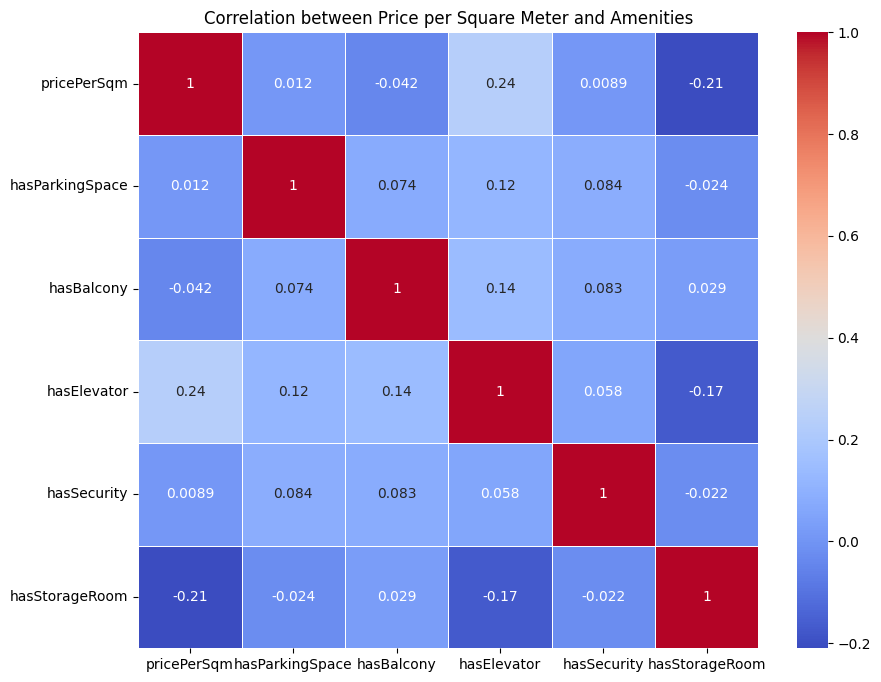

In [5]:
visualize_price_vs_amenities_correlation(df)

### Аналітичний висновок 

Ця візуалізація — кореляційна матриця, що показує взаємозв'язок між ціною за квадратний метр (`pricePerSqm`) та наявністю різних зручностей у квартирі, таких як паркувальне місце, балкон, ліфт, охорона та комора.

#### Основні спостереження:
1. **Ліфт (`hasElevator`) та ціна за квадратний метр**:
   - Спостерігається помірно позитивна кореляція (0.24) між наявністю ліфта та ціною за квадратний метр. Це означає, що квартири, які мають доступ до ліфта, мають тенденцію коштувати дорожче. Це логічно, оскільки наявність ліфта значно підвищує комфорт проживання, особливо у багатоповерхових будинках.

2. **Комора (`hasStorageRoom`) та ціна за квадратний метр**:
   - Негативна кореляція (-0.21) між наявністю комори та ціною за квадратний метр може свідчити про те, що квартири з коморою розташовані в менш престижних районах або в будинках з нижчою середньою вартістю. Можливо, комори частіше пропонуються в старих будівлях або в районах з нижчим рівнем цін.

3. **Інші зручності**:
   - Паркувальне місце (`hasParkingSpace`), балкон (`hasBalcony`) та охорона (`hasSecurity`) не показують значної кореляції з ціною за квадратний метр. Значення кореляційних коефіцієнтів дуже низькі (від 0.01 до 0.08), що вказує на те, що ці зручності не мають суттєвого впливу на вартість квартир у загальному контексті ринку Кракова.

#### Висновок:
- **Ліфт** є єдиною зручністю, яка має значний вплив на ціну квартири, що вказує на важливість цієї характеристики для потенційних покупців.
- **Комора** виявляє негативний зв'язок з ціною, що може свідчити про специфіку пропозиції таких квартир.
- Інші зручності, як паркувальне місце, балкон та охорона, не мають значного впливу на ціну за квадратний метр, що може бути пояснено тим, що такі зручності є досить стандартними для більшості квартир.

Ця візуалізація допомагає зрозуміти, які фактори комфорту впливають на ціну, і може бути корисною для забудовників, які хочуть визначити, на чому робити акцент під час будівництва нових квартир.

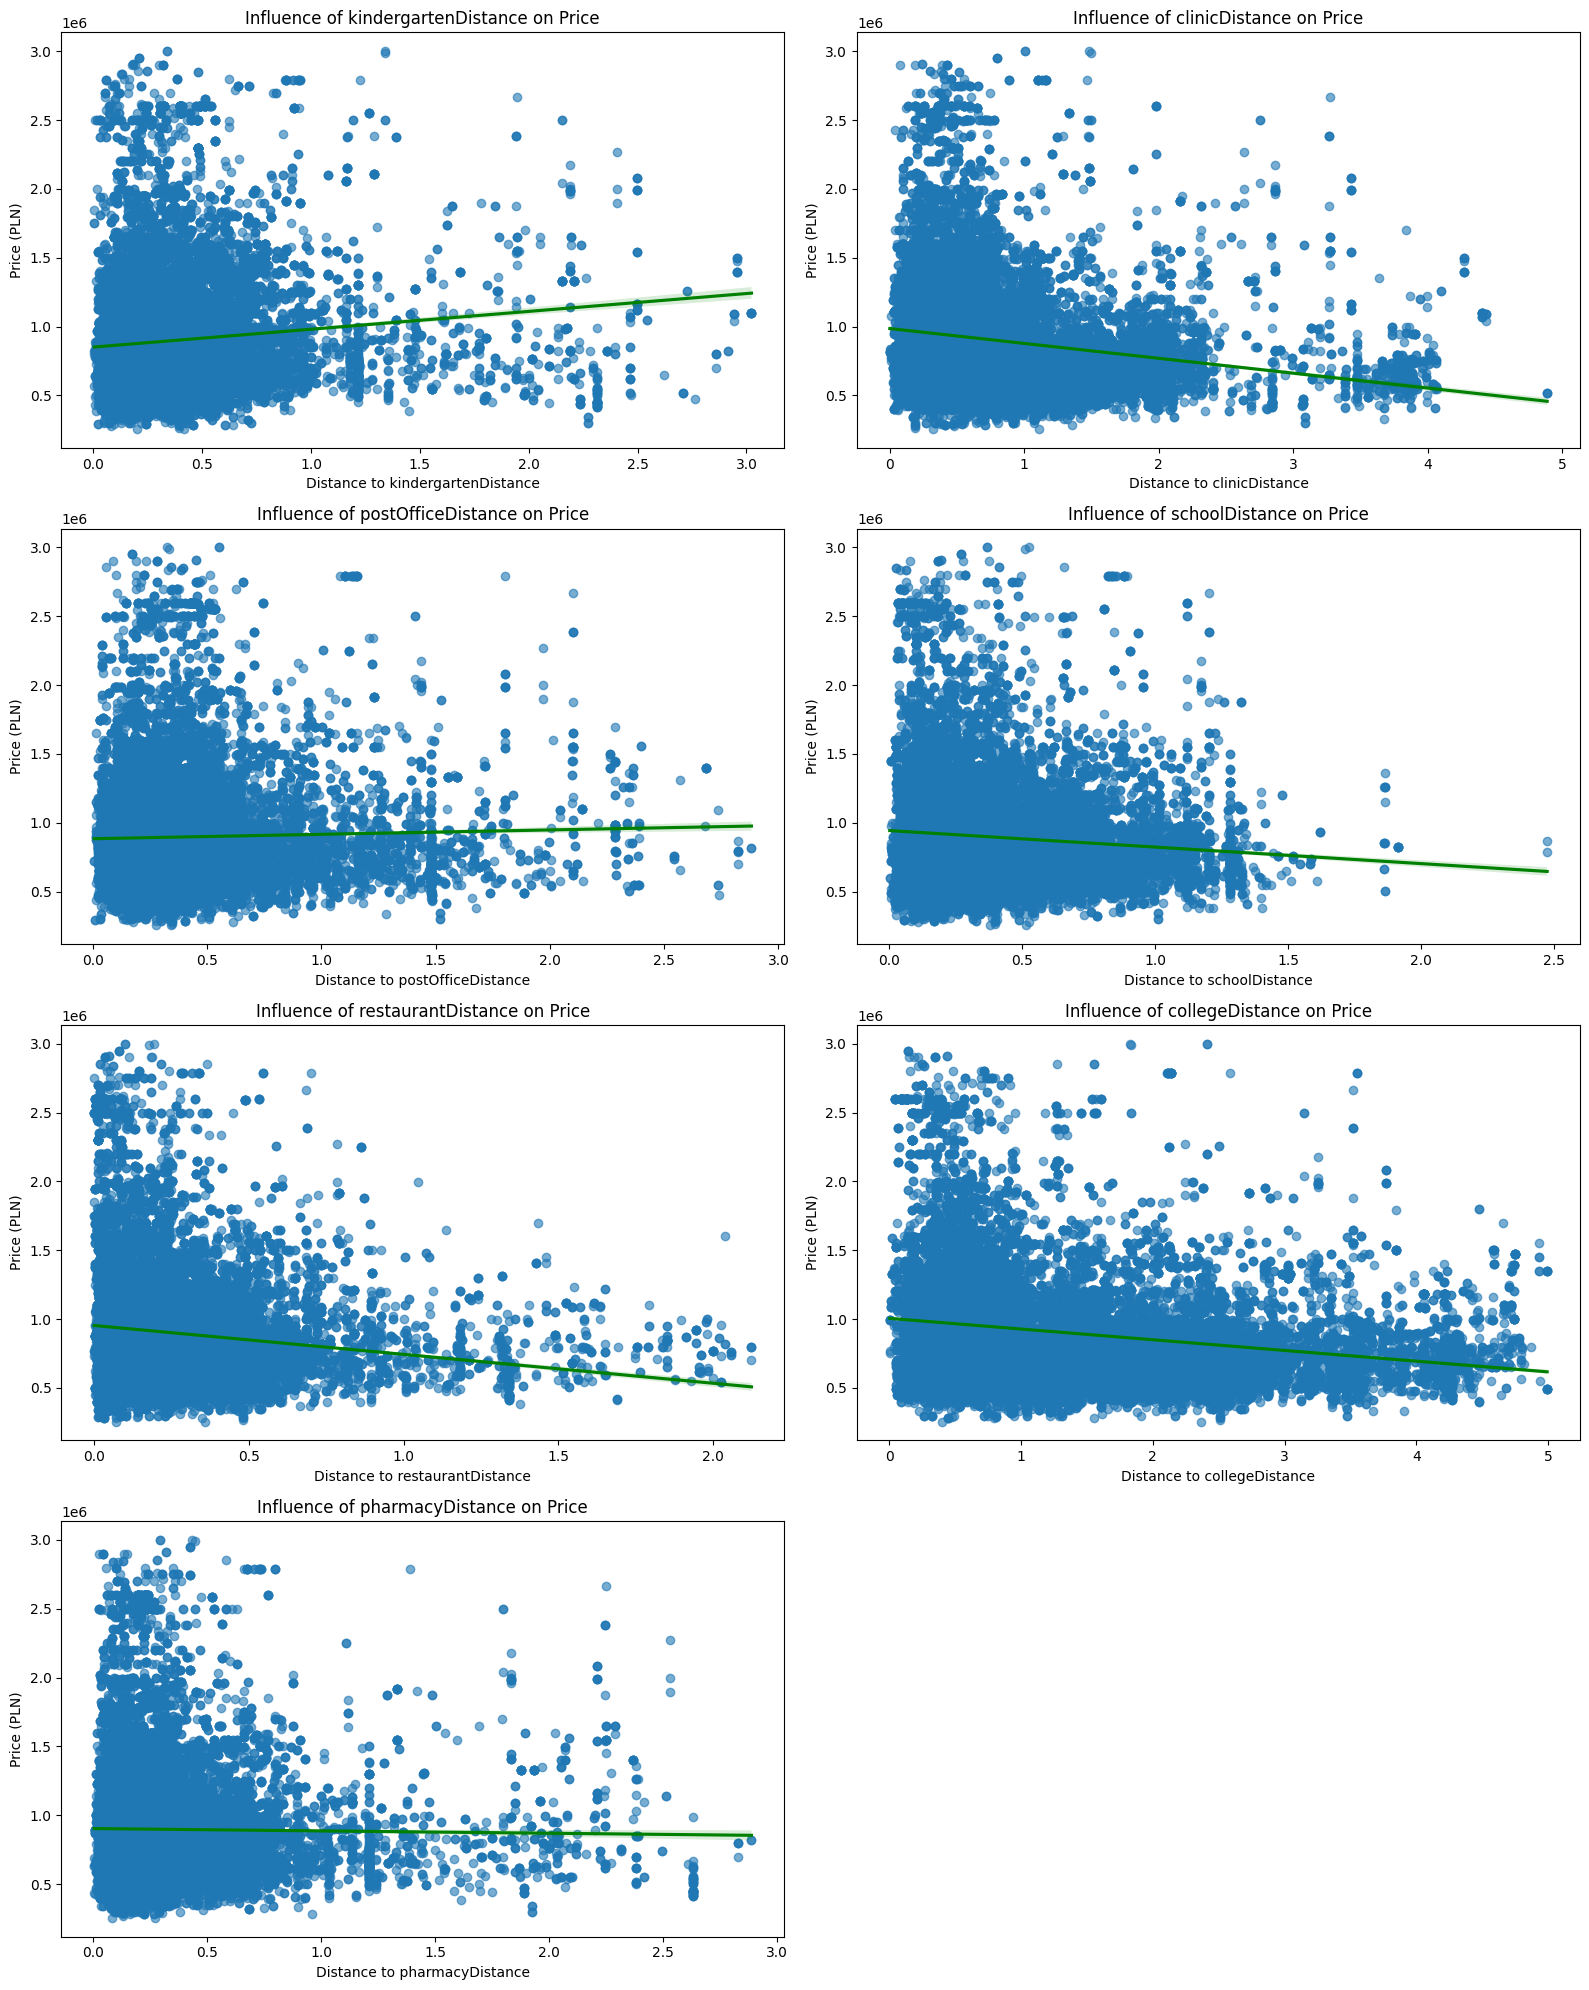

In [6]:
visualize_poi_influence_on_price(df)

### Аналітичний висновок 

Ця візуалізація містить кілька графіків розсіювання (scatter plots), що показують вплив відстані до різних точок інтересу (POI) на ціну квартир. Зелена лінія тренду допомагає візуально оцінити загальну тенденцію впливу відстані на ціну.

#### Основні спостереження:

1. **Відстань до дитячих садків (`kindergartenDistance`) та ціна**:
   - Відсутня значна кореляція між відстанню до дитячих садків та ціною квартири. Лінія тренду майже горизонтальна, що вказує на мінімальний вплив цього параметру на ціну.

2. **Відстань до клінік (`clinicDistance`) та ціна**:
   - Негативна тенденція: спостерігається зниження ціни при збільшенні відстані до клінік, але цей вплив не є дуже вираженим. Це може свідчити про те, що близькість до медичних установ має певне значення для покупців, але не є вирішальним фактором.

3. **Відстань до поштових відділень (`postOfficeDistance`) та ціна**:
   - Лінія тренду майже горизонтальна, що свідчить про мінімальний або відсутній вплив близькості до поштових відділень на ціну нерухомості.

4. **Відстань до шкіл (`schoolDistance`) та ціна**:
   - Слабка негативна кореляція: ціна квартир трохи знижується з віддаленням від шкіл. Це може бути важливим для сімей з дітьми, які надають перевагу житлу неподалік навчальних закладів.

5. **Відстань до ресторанів (`restaurantDistance`) та ціна**:
   - Також спостерігається незначний негативний вплив на ціну з віддаленням від ресторанів. Це вказує на те, що покупці можуть вважати близькість до місць для відпочинку додатковою перевагою.

6. **Відстань до коледжів (`collegeDistance`) та ціна**:
   - Виявлено чіткішу негативну тенденцію між відстанню до коледжів та ціною. Це може бути обумовлено попитом на житло неподалік навчальних закладів, зокрема для студентів або викладачів.

7. **Відстань до аптек (`pharmacyDistance`) та ціна**:
   - Вплив відстані до аптек на ціну не є значним, що вказує на те, що цей параметр не має великої ваги для покупців житла.

#### Висновок:
- Загалом, можна сказати, що відстань до клінік, шкіл, ресторанів та коледжів має певний вплив на ціну квартир, але цей вплив не є дуже вираженим.
- Покупці можуть надавати перевагу квартирам, які знаходяться ближче до медичних закладів, шкіл та місць для відпочинку, але інші фактори, такі як стан квартири, площа чи тип будівлі, можуть бути більш вирішальними.

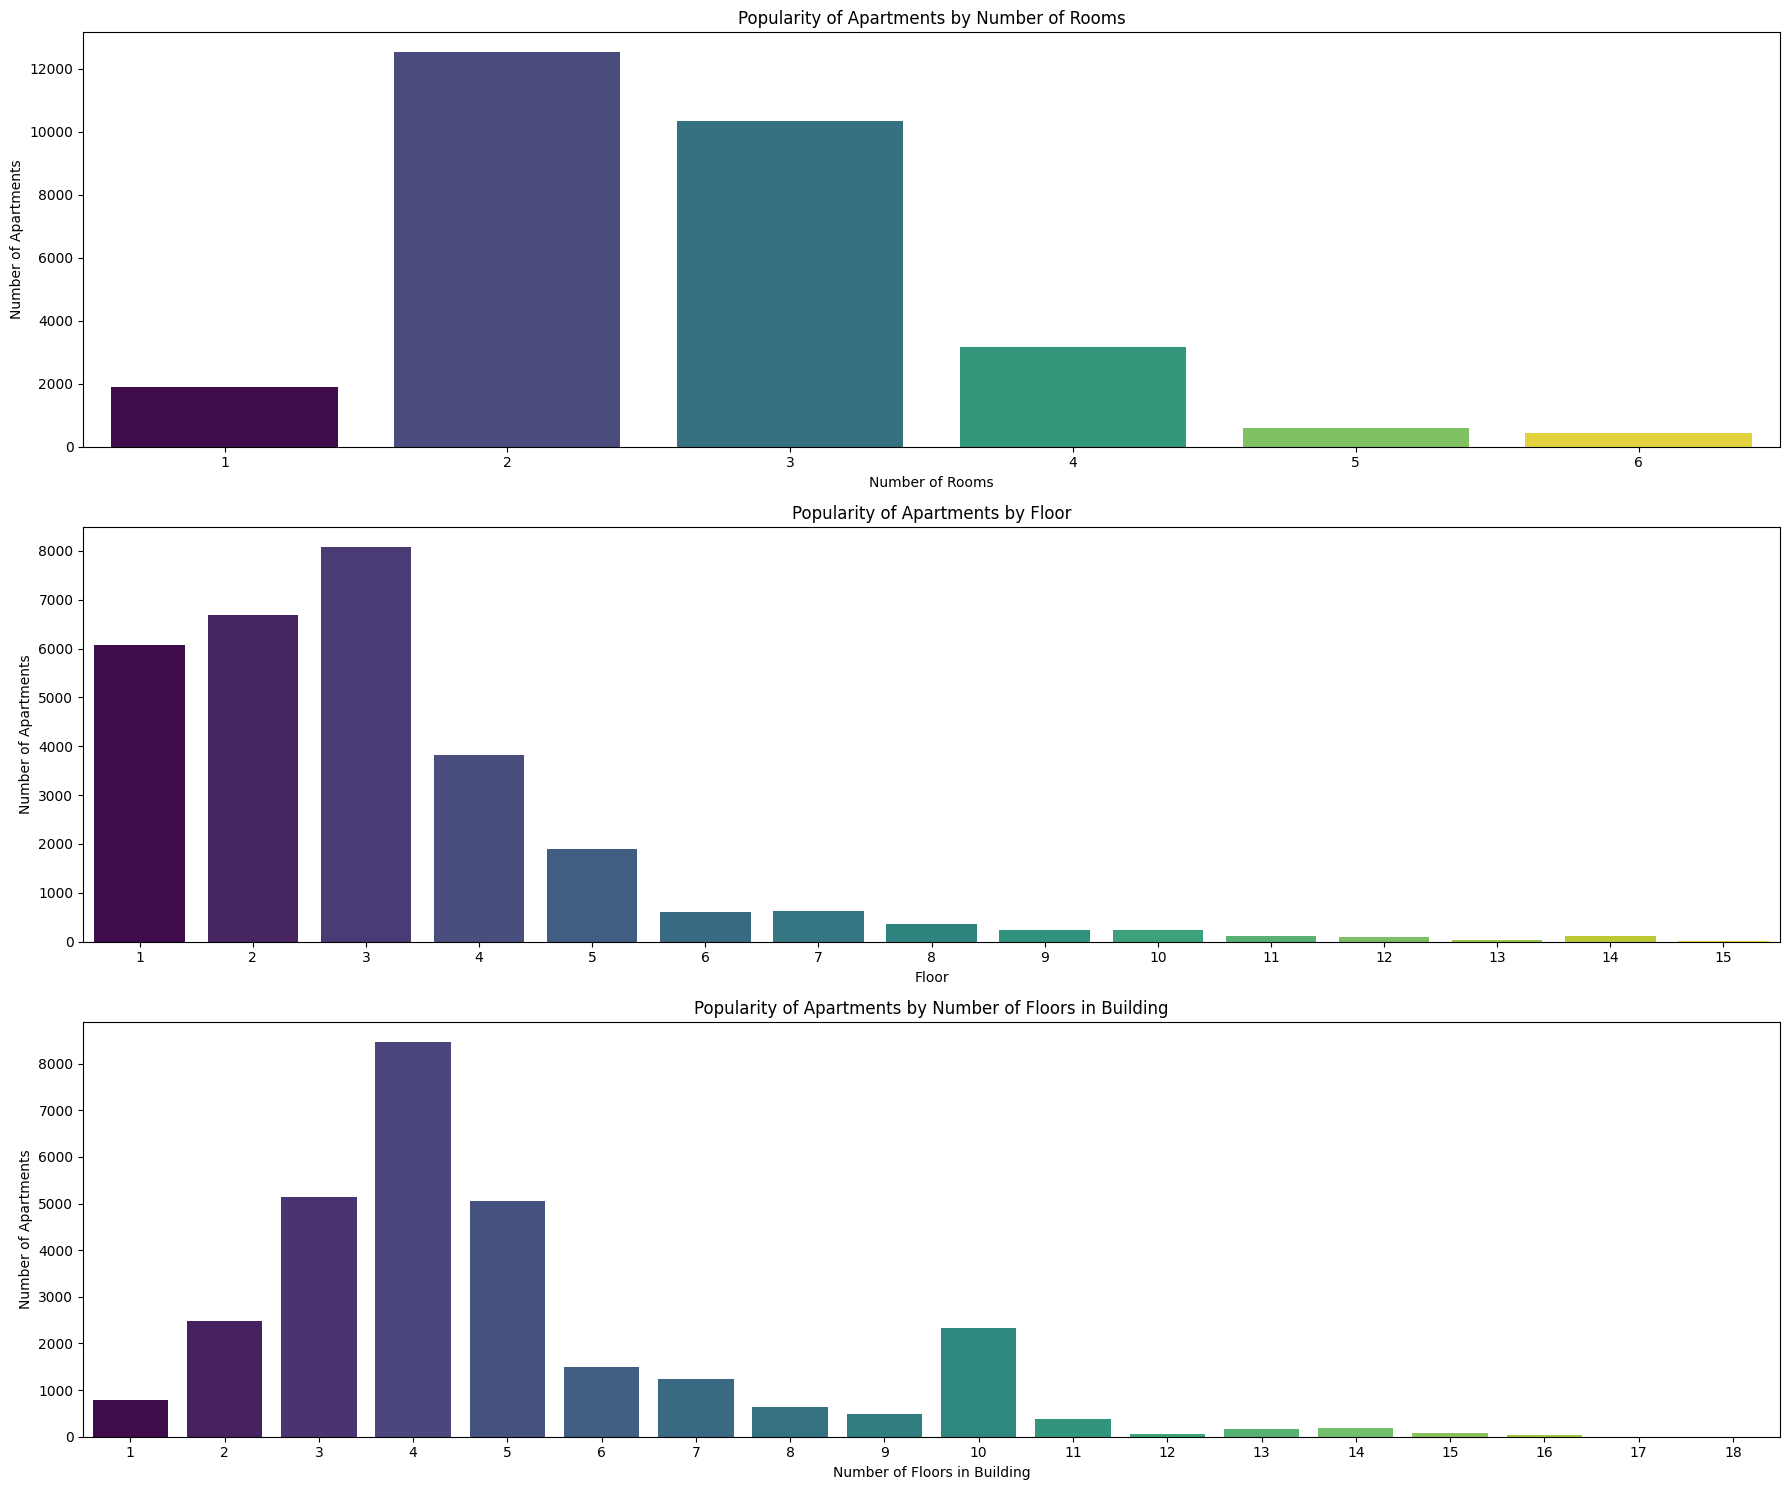

In [7]:
visualize_poi_popularity_by_parameters(df)

### Аналітичний висновок

Ця візуалізація складається з трьох бар-графіків, що показують популярність квартир у Кракові за кількістю кімнат, поверхом, на якому розташована квартира, та загальною кількістю поверхів у будівлі.

#### Основні спостереження:

1. **Популярність квартир за кількістю кімнат**:
   - Найпопулярнішими є квартири з **двома та трьома кімнатами**. Це може вказувати на високу потребу у квартирах середнього розміру, які підходять для сімей або людей, що бажають мати додатковий простір.
   - Квартири з **однією кімнатою** мають набагато менший попит. Це може бути пов'язано з тим, що менші квартири частіше орієнтовані на студентів або окремих мешканців, а основний попит приходиться на сім'ї, які надають перевагу більшій кількості кімнат.
   - Квартири з **чотирма та більше кімнатами** мають ще меншу популярність, що може вказувати на високу вартість таких квартир, або те, що вони потребують більших витрат на утримання.

2. **Популярність квартир за поверхом**:
   - Найбільш популярними є квартири, розташовані на **першому, другому та третьому поверхах**. Це свідчить про те, що покупці надають перевагу нижчим поверхам, можливо, через легкий доступ або меншу залежність від ліфта.
   - Попит на квартири, розташовані вище п'ятого поверху, значно зменшується. Це може бути пов'язано з незручністю для людей похилого віку або сімей з маленькими дітьми.
   - Квартири на дуже високих поверхах є найменш популярними, можливо через більшу вартість або менш комфортні умови, такі як сильний вітер чи залежність від ліфта.

3. **Популярність квартир за кількістю поверхів у будівлі**:
   - Найбільш популярними є будинки з **трьома, чотирма або п'ятьма поверхами**. Це може вказувати на те, що покупці надають перевагу будівлям середньої висоти, оскільки вони часто поєднують зручність доступу та комфорт.
   - **Десятиповерхові будинки** також користуються відносною популярністю, що свідчить про стабільний попит на квартири в багатоповерхових будівлях, особливо коли будинок має інфраструктуру (ліфт, парковка).
   - Попит на квартири в будинках з великою кількістю поверхів, таких як 15 або більше, дуже низький. Це, ймовірно, пов'язано з тим, що такі будинки менш популярні серед сімей або людей, які віддають перевагу менш інтенсивному життю.

#### Висновок:
- Найбільш популярними є **квартири середнього розміру** (2-3 кімнати), розташовані на **нижчих поверхах** у будівлях **середньої висоти**.
- Покупці надають перевагу квартирам, які знаходяться на нижчих поверхах, що може бути зручніше з точки зору доступності та безпеки.
- Будинки середньої висоти мають найбільший попит, оскільки вони поєднують переваги багатоквартирних будівель і комфорт меншої кількості сусідів.


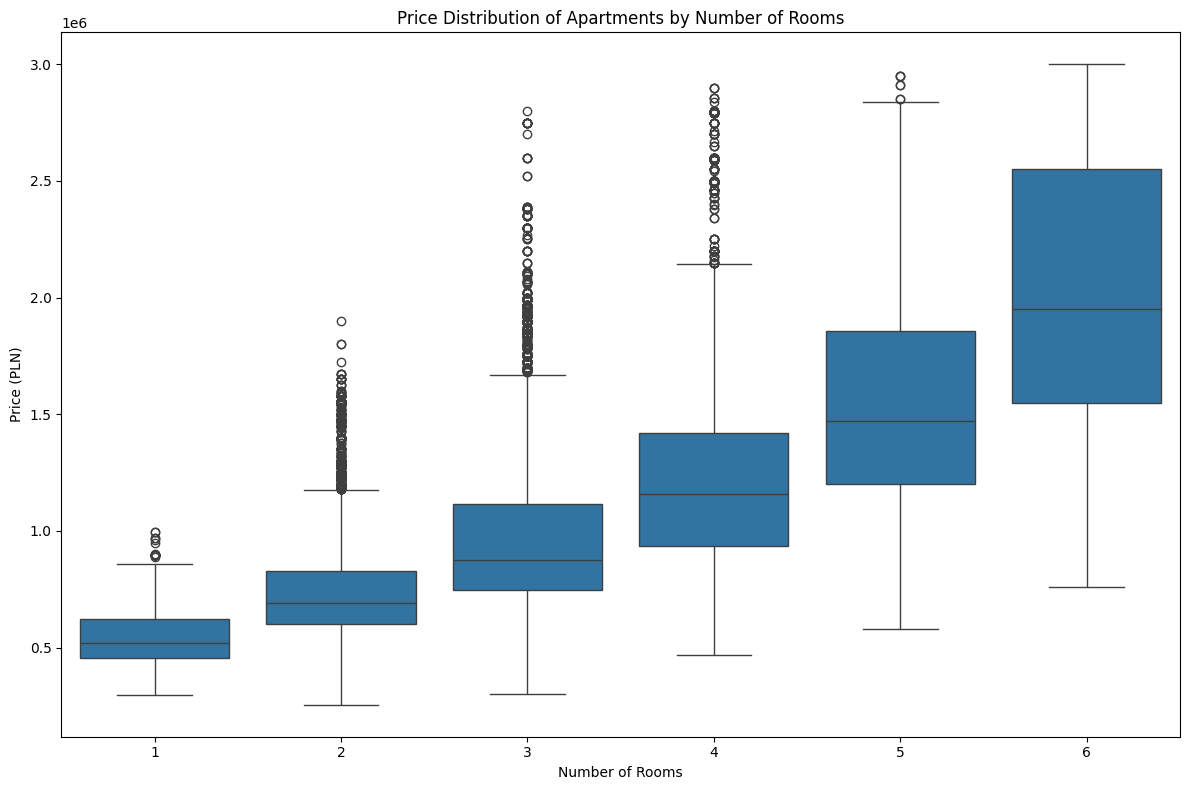

In [8]:
visualize_price_distribution_boxplot(df)

### Аналітичний висновок 

Ця візуалізація представляє коробчаті діаграми (box plots), які показують розподіл цін на квартири в залежності від кількості кімнат. Ці графіки дають уявлення про варіативність цін на квартири, а також про середні значення, розмах і наявність викидів.

#### Основні спостереження:

1. **Ціна та кількість кімнат**:
   - **Зростання цін**: Спостерігається чітка тенденція до зростання цін разом із збільшенням кількості кімнат. Квартири з більшою кількістю кімнат мають значно вищу медіанну вартість. Це очікувано, оскільки більші квартири потребують більше простору, а, отже, і вартість їх вища.
  
2. **Медіана та розмах цін**:
   - Для **квартир з однією кімнатою** середня ціна є найнижчою, а розмах вартості досить обмежений, що свідчить про більш стабільну ціну на ці типи квартир.
   - Квартири з **двома та трьома кімнатами** показують більший розмах цін, що може вказувати на різноманітність розташування та якості, що впливає на ціну.
   - Для **квартир з чотирма і більше кімнатами** спостерігається ще більший розмах цін, що свідчить про те, що квартири з більшою площею можуть сильно варіюватися за вартістю в залежності від додаткових характеристик (наприклад, розташування, якість будівництва тощо).

3. **Викиди**:
   - На графіках є значна кількість викидів (чорні кружечки), що вказує на наявність деяких квартир з цінами, значно вищими від середніх значень. Такі викиди можуть бути обумовлені ексклюзивними характеристиками квартир, наприклад, розташуванням у центральній частині міста або додатковими зручностями (балкони, вид на місто, тощо).

#### Висновок:
- Ціна квартир зростає зі збільшенням кількості кімнат, і цей зв'язок є досить чітким.
- Розмах цін значно зростає з більшою кількістю кімнат, що вказує на більшу варіативність цін для просторих квартир.
- Викиди свідчать про наявність елітних квартир, які значно дорожчі за більшість пропозицій на ринку.

Ця візуалізація може допомогти покупцям зрозуміти, що більші квартири можуть варіюватися в ціні значно більше, ніж квартири з однією або двома кімнатами. Це також надає корисну інформацію для оцінки ринкової вартості, залежно від кількості кімнат.

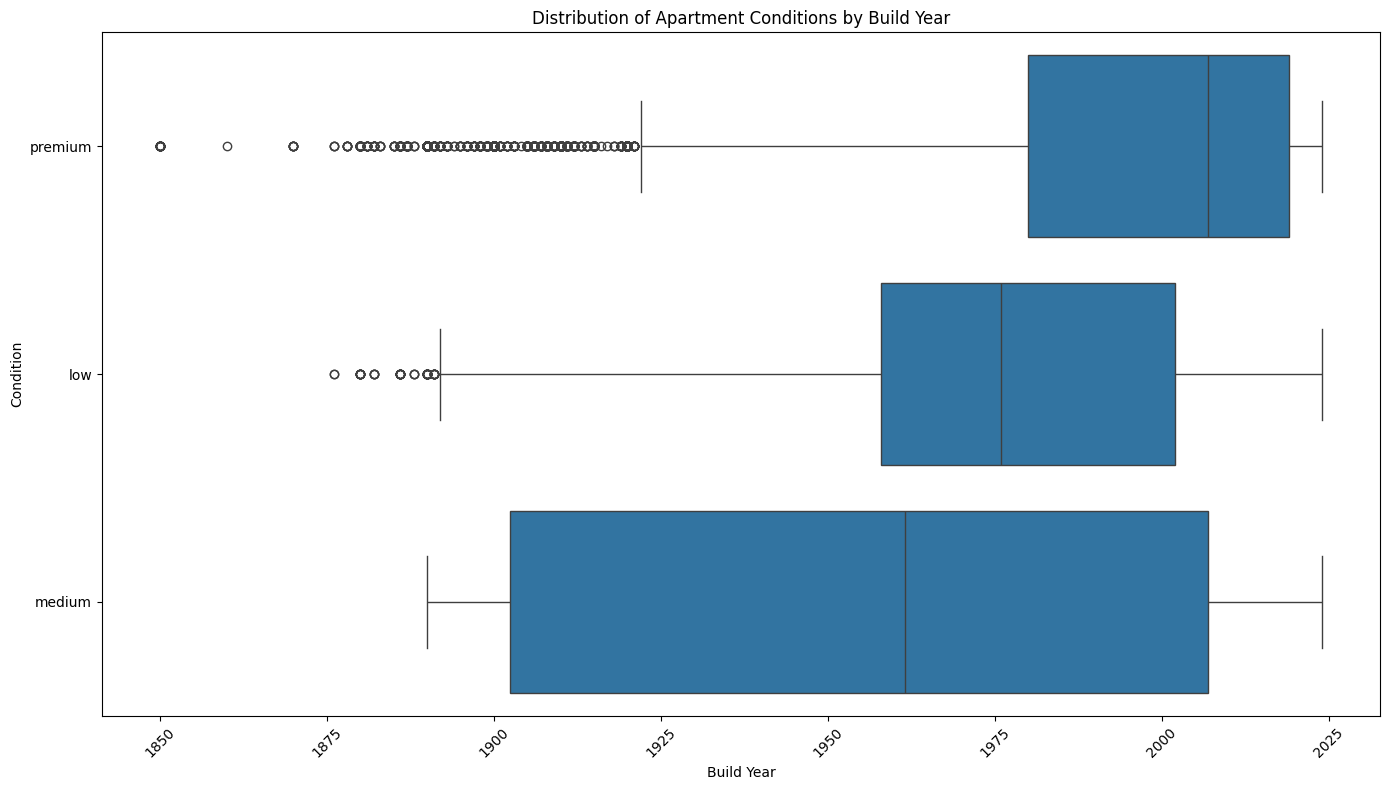

In [9]:
visualize_build_year_and_condition(df)

### Аналітичний висновок

Ця візуалізація є коробчатою діаграмою (box plot), що показує розподіл станів квартир у залежності від року їх побудови. Діаграма дозволяє візуально оцінити, як змінювався стан квартир у різні періоди часу.

#### Основні спостереження:

1. **Стан "premium"**:
   - Найчастіше квартири преміум-класу побудовані у більш сучасні роки, після 2000 року.
   - Існує значна кількість викидів для цього стану, особливо у ранні роки, що вказує на те, що деякі старі будівлі були модернізовані до преміум-класу.

2. **Стан "medium"**:
   - Квартири середнього стану розподілені досить рівномірно по всіх роках побудови. Більша частина квартир, побудованих у 20-му столітті, відповідають середньому стану.
   - Це може свідчити про те, що більшість квартир з часом зберегли свій стан або були оновлені до рівня середнього стану.

3. **Стан "low"**:
   - Квартири зі станом "low" здебільшого належать до будівель, збудованих до 1975 року. Це вказує на те, що старіші будівлі мають більше шансів зберегтися в поганому стані.
   - Бачимо меншу кількість викидів для цього стану, що може означати, що небагато старих будівель модернізуються до високого рівня, особливо в порівнянні з преміум-класом.

#### Висновок:
- Стан квартир значно залежить від року побудови, і квартири нових років переважно відповідають преміум-класу.
- Стан "medium" є досить поширеним серед будівель, побудованих у різні роки, що вказує на те, що ці квартири з часом були модернізовані або підтримувалися на середньому рівні.
- Найстаріші будівлі мають більше шансів залишатися у низькому стані, що може бути наслідком недостатнього оновлення або застарілої інфраструктури.

Ця візуалізація може допомогти забудовникам та інвесторам визначити, які будівлі потребують модернізації, а також вказати на тенденції ринку, коли йдеться про стан житлового фонду, в залежності від року його побудови.

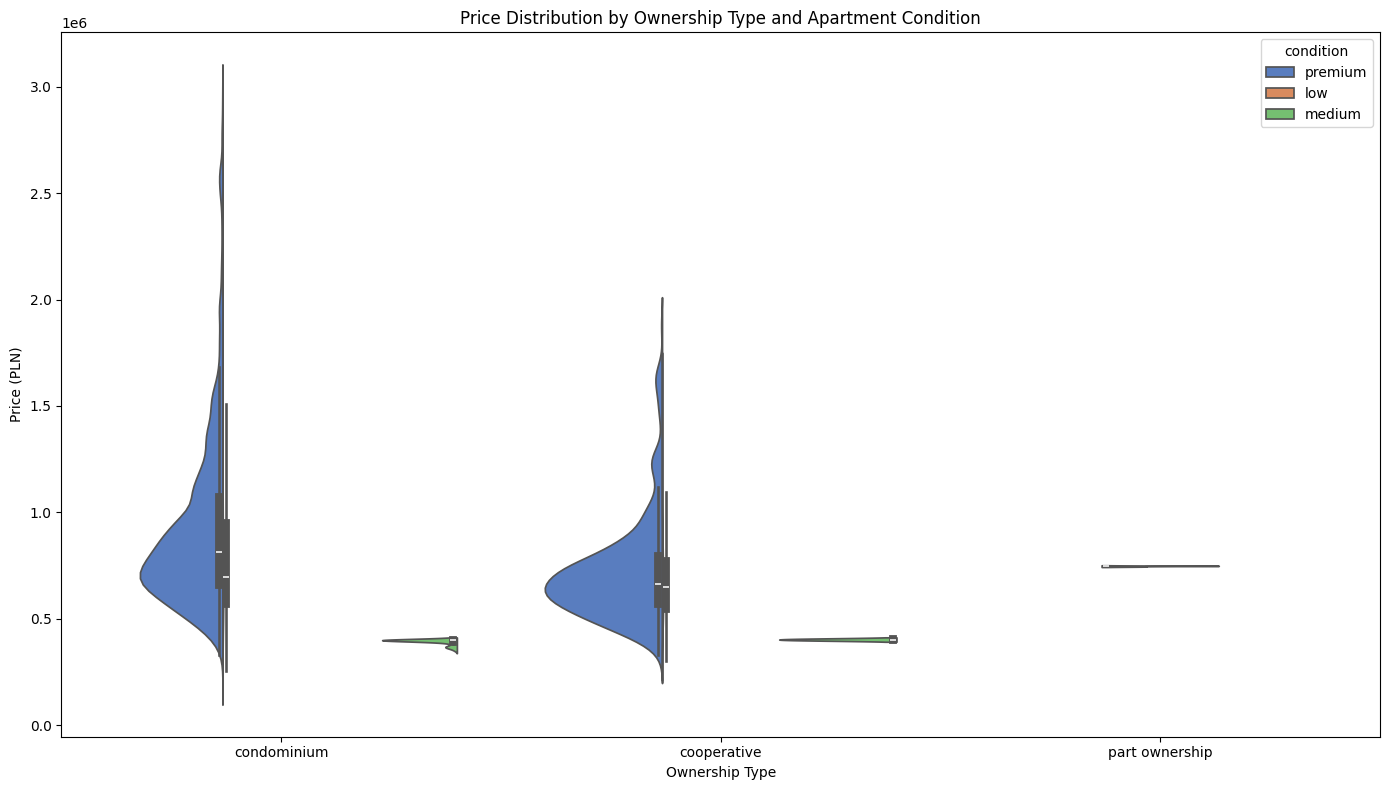

In [10]:
visualize_ownership_and_condition_vs_price(df)

### Аналітичний висновок для

Ця візуалізація є віолончельною діаграмою (violin plot), яка показує розподіл цін на квартири залежно від типу власності та стану квартири. Діаграма містить три типи власності: кондомініум, кооператив та часткове володіння, а також різні стани квартир (преміум, середній та низький).

#### Основні спостереження:

1. **Тип власності "condominium"**:
   - Квартири з типом власності "condominium" мають найвищу цінову варіативність, і саме цей тип власності включає найбільшу кількість квартир у преміум-класі. Розподіл цін на ці квартири демонструє великий розмах, що вказує на те, що кондомініуми мають різну якість, розташування та додаткові характеристики, які можуть сильно впливати на їх ціну.

2. **Тип власності "cooperative"**:
   - Цей тип власності має значно нижчу середню ціну порівняно з кондомініумами. Квартири цього типу частіше знаходяться у стані "medium" або "low", що свідчить про меншу загальну вартість і, можливо, про обмежені можливості модернізації або підтримки.

3. **Тип власності "part ownership"**:
   - Квартири з частковим володінням мають дуже обмежений ціновий діапазон, а також представлені переважно у стані "medium" або "low". Це вказує на те, що часткове володіння не є популярним вибором для квартир преміум-класу, а також на те, що цей тип власності має менший попит і, можливо, менше можливостей для покращення.

#### Висновок:
- **Кондомініуми** мають найбільший розмах цін, що вказує на значну варіативність якості та характеристик таких квартир. Вони є найбільш підходящими для покупців, які шукають житло преміум-класу.
- **Кооперативні квартири** мають менший ціновий діапазон і частіше відповідають середньому або низькому стану. Це може свідчити про їхню доступність для покупців із середнім доходом.
- **Часткове володіння** є найменш варіативним і не популярним для квартир з високою вартістю. Це, ймовірно, вказує на специфічні умови володіння, які можуть обмежувати можливості для інвестування.

Ця візуалізація може бути корисною для покупців, які обирають тип власності залежно від бюджету та очікуваного стану квартири, а також для забудовників, які прагнуть орієнтувати свої проєкти на конкретні сегменти покупців.

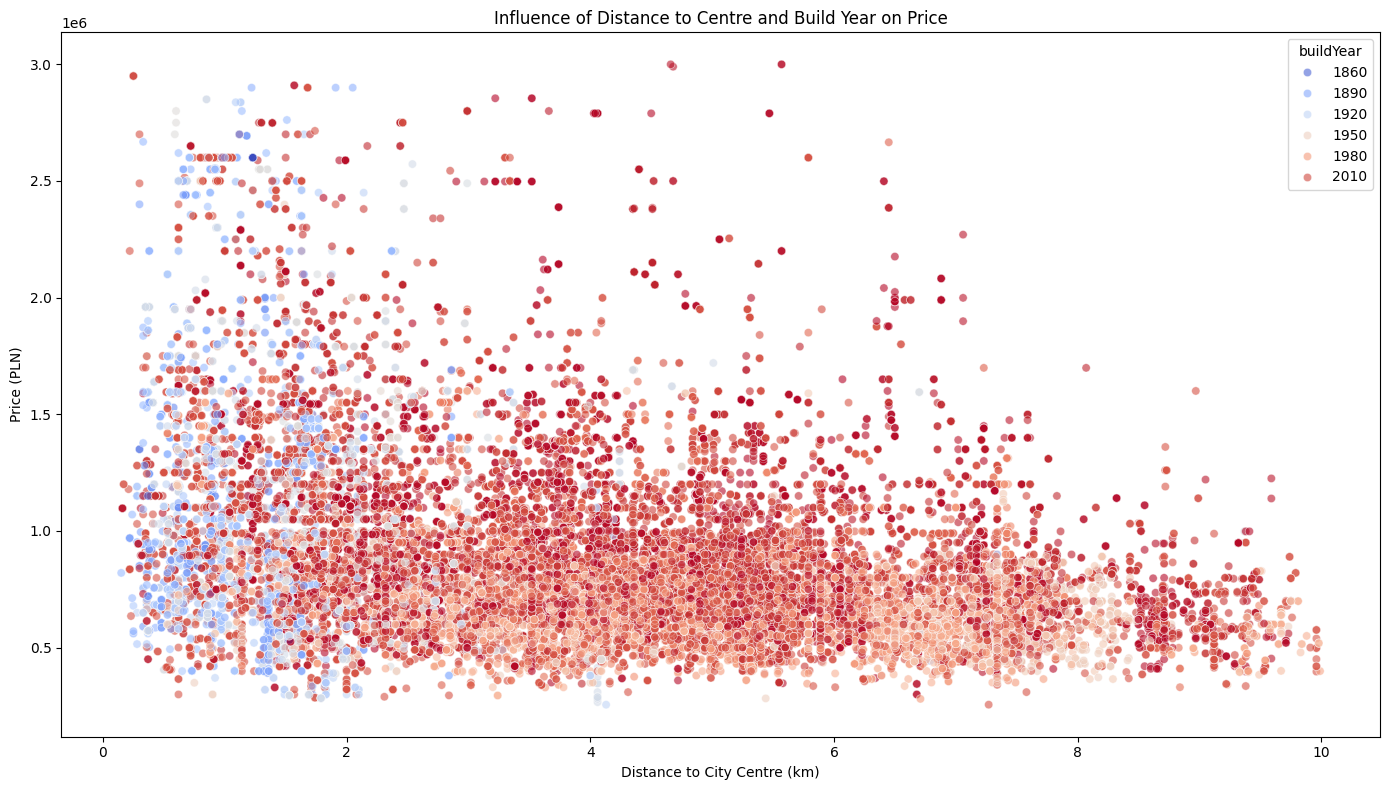

In [11]:
visualize_centre_distance_and_build_year_vs_price(df)

### Аналітичний висновок

Ця візуалізація є графіком розсіювання (scatter plot), який показує вплив відстані до центру міста та року побудови на ціну квартир у Кракові. Колір точок вказує на рік побудови: чим темніший колір, тим новіша будівля.

#### Основні спостереження:

1. **Вплив відстані до центру на ціну**:
   - Загалом, ціни на квартири зменшуються з віддаленням від центру міста. Це очікувано, оскільки квартири в центральних районах мають кращу інфраструктуру, доступ до культурних та розважальних закладів, що підвищує їхню привабливість і вартість.
   - У центральній частині міста (від 0 до 3 км від центру) спостерігається найбільша варіативність цін, зокрема багато квартир з дуже високою ціною. Це вказує на те, що центр міста має більше преміальних об'єктів, які пропонуються за високими цінами.

2. **Вплив року побудови на ціну**:
   - **Старі будівлі** (позначені синім кольором) в основному розташовані ближче до центру міста. Це логічно, оскільки історичні будівлі зазвичай зосереджені в центральних районах. Водночас, ці будівлі часто мають нижчі ціни, оскільки можуть потребувати ремонту або не мати сучасних зручностей.
   - **Новіші будівлі** (червоні відтінки) мають тенденцію бути розташованими як в центрі, так і на околицях. Ці новобудови можуть пропонувати більш сучасні умови, і їхня ціна може бути значно вищою, особливо в центральних районах.

3. **Тренди залежності між параметрами**:
   - Чітко видно, що **новіші будівлі** часто мають вищі ціни незалежно від відстані до центру. Це вказує на те, що новобудови загалом мають вищу ринкову ціну через кращу якість житла, сучасні зручності та підвищені стандарти будівництва.
   - **Старі будівлі** ближче до центру можуть мати як низькі, так і середні ціни, що свідчить про великий діапазон можливих станів цих будівель.

#### Висновок:
- **Ціна на квартиру** значною мірою залежить від відстані до центру міста — ближчі до центру квартири мають тенденцію бути дорожчими, незалежно від року побудови.
- **Новобудови** мають вищу ціну в порівнянні з старими будівлями, навіть якщо вони розташовані на відстані від центру. Це підкреслює попит на сучасні житлові комплекси.
- **Історичні будівлі**, особливо ті, що потребують ремонту, можуть пропонувати нижчу ціну навіть у центральних районах.

Ця візуалізація може бути корисною для інвесторів, які хочуть визначити, які фактори найбільше впливають на ціну квартири: близькість до центру чи рік побудови. Забудовники також можуть використовувати цю інформацію для кращого позиціонування своїх проєктів залежно від ринкових умов.

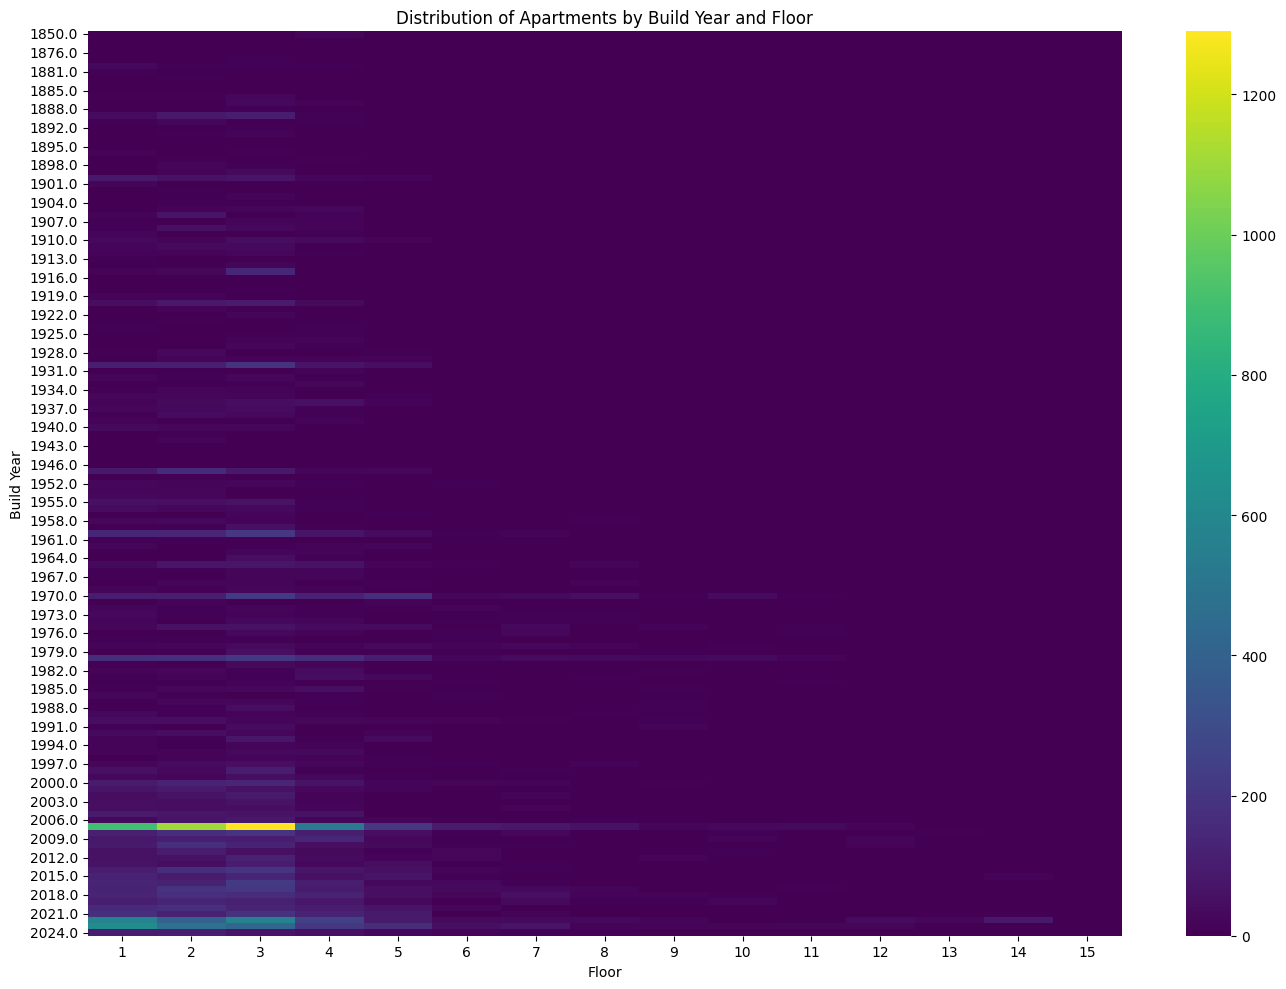

In [12]:
visualize_build_year_and_floor_distribution(df)

### Аналітичний висновок 

Ця візуалізація є тепловою картою (heatmap), яка показує розподіл квартир за роком побудови та поверхом. На осі Y показаний рік побудови будівлі, а на осі X — поверх, на якому знаходиться квартира. Інтенсивність кольору вказує на кількість квартир, побудованих у відповідному році на відповідному поверсі.

#### Основні спостереження:

1. **Роки побудови та поверхи**:
   - **Новіші будівлі (після 2000 року)** переважно мають квартири на перших декількох поверхах (1-5). Ці поверхи є найбільш популярними для забудови сучасних будівель. Це може бути пов'язано з орієнтацією на зручність доступу та можливість кращого планування будівель середньої висоти.
   - **Будівлі, побудовані в середині та другій половині 20-го століття (1960-1980 роки)**, мали значну кількість квартир на різних поверхах, що може вказувати на розвиток багатоповерхових будинків у той період.

2. **Тенденції будівництва**:
   - **Багатоповерхові будинки** (поверхи 10 і вище) почали частіше з'являтися в другій половині 20-го століття, що може бути обумовлено розширенням міст та необхідністю побудови більшої кількості квартир на меншій території.
   - **Сучасні будівлі (після 2010 року)** частіше зосереджуються на нижчих поверхах. Це свідчить про те, що забудовники зосереджуються на меншій кількості поверхів, можливо, враховуючи зручність та підвищений попит на житло з легким доступом.

3. **Розподіл по поверхах**:
   - Найбільша кількість квартир у **сучасних будівлях** розташована на перших кількох поверхах, що може бути обумовлено орієнтацією на сім'ї з дітьми та людей похилого віку, які не хочуть залежати від ліфта.
   - **Старі будівлі (до 1950-х років)** мають значно менше квартир, і більшість з них знаходяться на нижчих поверхах. Це свідчить про те, що ці будинки були спроектовані з меншою кількістю поверхів.

#### Висновок:
- Розподіл квартир за роками побудови та поверхами демонструє тенденцію до будівництва багатоповерхових будинків у середині та другій половині 20-го століття.
- Сучасні будівлі частіше обмежуються нижчими поверхами, що може вказувати на зміни у вимогах покупців щодо зручності доступу.
- Забудовники, враховуючи сучасні тренди, можуть більше зосереджуватися на будівлях середньої висоти, які мають велику кількість квартир на перших кількох поверхах.

Ця візуалізація надає цінну інформацію для розуміння розвитку міського будівництва у Кракові, що може бути корисно забудовникам для планування майбутніх проєктів, враховуючи попит на певну висоту будівель та популярність різних поверхів.

### Аналітичний висновок для інвестора, в Кракові

На основі аналізу ринку нерухомості в Кракові та наданих візуалізацій, можна зробити кілька ключових висновків, які будуть корисні для тих, хто хоче інвестувати в житло для подальшого отримання прибутку, наприклад, від здачі в оренду або перепродажу. Цей аналіз допоможе вибрати оптимальну квартиру, враховуючи такі фактори як розташування, вік будівлі, зручності та стан житла.

#### 1. **Розташування для високого попиту**
   - **Близькість до центру**: Найкращі можливості для інвестицій мають квартири, розташовані в межах 3 км від центру Кракова. Ці квартири є привабливими для орендарів, особливо для молодих професіоналів, туристів та студентів, які цінують доступ до розваг, роботи, громадського транспорту та інфраструктури. Квартири ближче до центру мають вищі ціни, але і більший попит на оренду, що дозволить забезпечити стабільний дохід.
   - **Відстань до точок інтересу**: Квартири, які розташовані поблизу шкіл, ресторанів, аптек та громадських місць, є більш привабливими для орендарів. Варто розглядати об'єкти в радіусі 1-2 км від таких точок інтересу, що забезпечить високий попит на оренду.

#### 2. **Тип будівлі та рік побудови**
   - **Новобудови (після 2000 року)**: Інвестиції в сучасні квартири є більш привабливими, оскільки вони мають вищу вартість і приносять більший дохід від оренди. Новобудови часто мають кращі умови для проживання, наприклад, сучасні ліфти, парковки, охорону, що робить їх більш привабливими для орендарів.
   - **Розподіл за поверхами**: Найкраще інвестувати в квартири на **2-3 поверхах**. Ці поверхи є зручними для більшості орендарів (особливо для сімей з дітьми або літніх людей) і забезпечують кращу ліквідність на ринку оренди. Верхні поверхи також можуть бути привабливими, якщо є ліфт і якщо вони пропонують панорамний вид.

#### 3. **Кількість кімнат та площа**
   - **Двокімнатні та трикімнатні квартири** є найоптимальнішим вибором для інвестицій. Вони забезпечують найкращий баланс між вартістю оренди та попитом, а також є популярними серед сімей, молодих пар та студентів. Однокімнатні квартири можуть мати попит серед одиноких людей або студентів, але їхній потенціал для довготривалої оренди нижчий.
   - **Ціна за квадратний метр**: Квартири в центральній частині міста мають високу ціну за квадратний метр, однак це компенсується високим попитом на оренду та можливістю встановлення високої орендної ставки.

#### 4. **Тип власності**
   - **Кондомініуми** є найкращим варіантом для інвестицій, оскільки вони пропонують більшу гнучкість і можливість для перепродажу з більшою прибутковістю. Квартири в кондомініумах часто мають кращий стан та зручності, що робить їх привабливими для орендарів та забезпечує більший дохід від оренди.
   - **Кооперативне житло** також може бути хорошим варіантом для інвесторів з обмеженим бюджетом, однак ліквідність і можливість для зростання вартості такого житла є нижчими.

#### 5. **Стан квартири та зручності (аменіті)**
   - **Стан "преміум"** або **"середній"** є найкращим вибором для інвестицій. Квартири преміум-класу мають вищу вартість і забезпечують більший дохід від оренди, особливо в центральних районах. Квартири середнього стану також можуть приносити добрий дохід від оренди, особливо якщо вони розташовані в зручних для проживання районах.
   - **Зручності**: Наявність таких зручностей, як **ліфт, балкон, місце для паркування та охорона**, значно підвищує привабливість квартири для орендарів. Зокрема, наявність балкону або тераси є дуже важливою перевагою, особливо для квартир у центральних районах, де приватний простір є обмеженим.

#### **Рекомендації для інвестора**
- **Локація**: Найкращим варіантом для інвестицій є квартири, розташовані в межах 3 км від центру Кракова або поблизу популярних точок інтересу. Це забезпечить високий попит на оренду і стабільний дохід.
- **Тип будівлі та поверх**: Сучасні новобудови після 2000 року є найкращим вибором для інвестицій. Вибирайте квартири на 2-3 поверхах або на верхніх поверхах з гарним видом і ліфтом.
- **Тип власності**: Найбільш привабливим варіантом для інвестицій є кондомініуми, оскільки вони пропонують більшу гнучкість для перепродажу або здачі в оренду.
- **Кількість кімнат**: Двокімнатні або трикімнатні квартири є оптимальними для інвестицій, оскільки вони мають високий попит на ринку оренди.
- **Зручності та стан**: Наявність зручностей, таких як ліфт, балкон та паркінг, підвищує привабливість квартири для орендарів. Вибирайте квартири з преміум або середнім станом для максимізації прибутковості.

Забезпечивши правильний вибір об'єкта нерухомості відповідно до цих критеріїв, ви зможете забезпечити стабільний дохід від оренди або вигідну перепродажу квартири на ринку нерухомості в Кракові.

### Аналітичний висновок для покупця квартири в Кракові з середнім бюджетом

На основі аналізу ринку нерухомості в Кракові, можна надати рекомендації для родини з двох дорослих і однієї дитини, яка шукає комфортне житло в Кракові з середнім бюджетом. Враховуючи особливості ситуації, такі як бажання мати зручності та відповідну кількість кімнат, розглянемо найкращі варіанти для придбання житла.

#### 1. **Місце розташування**
   - **Околиця центру міста**: Найкращим варіантом буде розташування квартири на відстані **3-5 км від центру** міста. Це забезпечує відносно доступні ціни, а також легкий доступ до ключових точок інфраструктури — громадського транспорту, магазинів, шкіл та лікарень. Життя ближче до центру буде зручнішим з точки зору доступності, але з нижчою вартістю порівняно з центральними районами.

#### 2. **Тип будівлі та поверх**
   - **Сучасні будівлі (після 2000 року)**: Якщо ви шукаєте зручне і надійне житло, варто розглянути новобудови або сучасні будівлі. Вони мають сучасні стандарти комфорту, які включають ліфти, зручні планування квартир та інші необхідні зручності. Вартість квартир у таких будинках буде дещо вищою, проте ці інвестиції забезпечать комфорт проживання на довгий термін.
   - **Поверх**: Рекомендується вибирати квартиру на **2-3 поверхах**. Ці поверхи забезпечують зручність доступу, особливо для родини з маленькою дитиною, а також кращі умови з точки зору безпеки та відсутності залежності від ліфта.

#### 3. **Кількість кімнат та площа**
   - **Трикімнатна квартира** буде найкращим вибором для вашої родини. Одна з кімнат може використовуватися як дитяча, а ще одна як спальня для батьків. Це дозволить забезпечити комфортне проживання, створити приватний простір для кожного члена сім'ї та водночас залишити достатньо місця для спільного проведення часу.
   - Квартири такого типу (з трьома кімнатами) є достатньо популярними і доступні за ціною в околицях центру Кракова.

#### 4. **Тип власності**
   - **Кондомініум** є оптимальним вибором для сімейного проживання. Кондомініуми пропонують більше можливостей для модернізації та безпечне оточення, часто з додатковими зручностями, такими як охорона або відеоспостереження. Це дозволить створити більш комфортне середовище для вашої родини.

#### 5. **Стан квартири та зручності (аменіті)**
   - **Середній стан**: Найкраще обирати квартиру в середньому стані. Такі квартири є доступнішими за ціною, але водночас забезпечують комфортне проживання. За необхідності можна вкласти кошти в ремонт, щоб привести її до бажаного стану.
   - **Зручності**:
     - **Балкон**: Наявність балкону є важливою перевагою, особливо для сімей з дітьми, оскільки він може використовуватися для відпочинку або зберігання.
     - **Ліфт**: Якщо обираєте квартиру на 3 поверсі або вище, наявність ліфта є обов'язковою для зручності, особливо коли потрібно переміщувати дитячий візок.
     - **Місце для паркування**: Наявність паркувального місця є значною перевагою, особливо якщо у вас є автомобіль. Це забезпечить додатковий комфорт у повсякденному житті.

#### 6. **Відстань до точок інтересу**
   - **Школи, дитячі садочки та медичні заклади**: Важливо, щоб квартира була розташована поблизу шкіл, дитячих садочків та клінік. Це забезпечить зручний доступ для дитини до навчальних закладів та гарантує швидку медичну допомогу у разі потреби.
   - **Ресторани та магазини**: Близькість до супермаркетів та ресторанів також є значною перевагою, оскільки це дозволяє легко вирішувати питання щоденного забезпечення продуктами та приємного проведення часу поза домом.

#### **Рекомендації для сімейного проживання**
- **Локація**: Для вашої родини найкраще підійде квартира на відстані **3-5 км від центру Кракова**. Це поєднує в собі зручність доступу до інфраструктури з доступними цінами на житло.
- **Тип будівлі та поверх**: Сучасні будівлі після 2000 року будуть найкращим варіантом. Обирайте квартири на 2-3 поверхах для зручності та комфорту.
- **Тип власності**: **Кондомініум** — найкращий вибір для сім'ї, що гарантує безпечне середовище та додаткові зручності.
- **Кількість кімнат**: Трикімнатна квартира забезпечить комфортне проживання для вас і вашої дитини, дозволить мати приватний простір і комфортну спільну зону.
- **Зручності**: Наявність **балкону, ліфта та місця для паркування** значно покращить комфорт проживання.
